<a href="https://colab.research.google.com/github/AIXplorerLize/TopicModeling-repo/blob/main/Lize_Alet_Morkel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhancing Multiclass Topic Modeling for Yelp Reviews using BERTopic and Zero-shot Techniques

In this study, we leverage the power of advanced techniques like BERTopic and Zero-shot Topic Modeling to extract meaningful topics from multiclass text documents sourced from Yelp reviews. **BERTopic**, a cutting-edge approach in Natural Language Processing, employs transformer embeddings and clustering. The process begins with document embedding, which translates text into vector representations. Subsequently, clustering comes into play, serving as a dimensionality reduction technique.

A complementary technique we explore is **Zero-shot Topic Modeling**, which excels at labeling unseen class-labeled data. This aspect serves to demonstrate the accuracy of BERTopic predictions when compared against Zero-shot classifications. The mechanics of the zero-shot model hinge on the following elements: candidate labels, and predefined label hypothesis templates to fortify prediction accuracy. This model yields single label prediction scores for each document-topic pair.

**Methodologically**, the extraction of topics is initiated via BERTopic predictions, subsequently serving as candidate labels within the realm of zero-shot topic modeling. This integration culminates in refined predictions that encapsulate the essence of the original text documents.

# Importing and installing packages

In [ ]:
!pip install bertopic

In [ ]:
!pip install hdbscan

In [ ]:
import pandas as pd
import numpy as np

# BERTopic model
from bertopic import BERTopic

# Dimension reduction
from umap import UMAP
from hdbscan import HDBSCAN

# Count vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Maximal Marginal Relevance
from bertopic.representation import MaximalMarginalRelevance

# Importing Yelp dataset

Next we import the data. It is a dataset from UCI is a comprehensive collection of reviews and business data. It encompasses various businesses, locations, and user reviews.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

yelp_review = pd.read_csv('/content/drive/MyDrive/yelp.csv')

# Keep only the 'text' column
yelp_review = yelp_review[['text']]

yelp_review.head()

,text
0,My wife took me here on my birthday for breakf...
1,I have no idea why some people give bad review...
2,love the gyro plate. Rice is so good and I als...
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,General Manager Scott Petello is a good egg!!!...


In [ ]:
# Shape
yelp_review.shape

(10000, 1)

The dataset has 1000 rows and one column (text).

In [ ]:
# Dataset information
yelp_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


Next, we check for missing values.

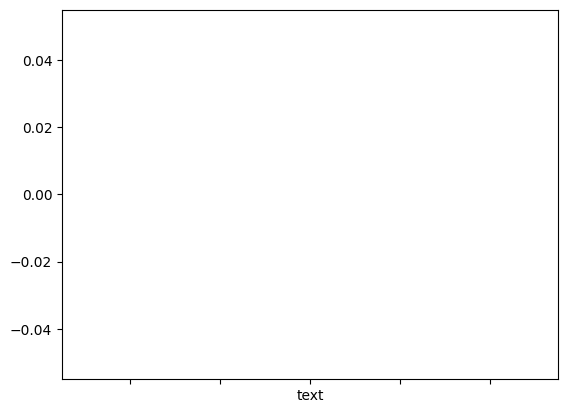

In [ ]:
yelp_review.isna().sum().plot();

**THERE ARE NO MISSING VALUES**

# BERTopic modeling



Steps for BERTopic modeling:

**Step 1: Embedding**

- BERTopic employs an **embedding model** to generate topic representations. The process involves utilizing an embedding model, initializing UMAP and HDBSCAN models, processing English text data, and calculating topic probabilities.

**Step 2: Dimensionality Reduction**

- **UMAP** is applied with hyperparameters for preserving local and global structure, such as balancing neighbors, retaining meaningful dimensions, preventing overlap, and capturing semantic similarity.

**Step 3: Clustering**

- **HDBSCAN** clusters data points, ensuring sufficient samples per cluster, determining robust core points, and utilizing the 'euclidean' distance metric for effective clustering.

**Step 4: Post-Processing**

- **Maximal Marginal Relevance (MMR)** is employed with a diversity parameter to select items that balance relevance and diverse coverage, enhancing the comprehensiveness and focus of the results.


## Hyperparameter Tuning for BERTopic

UMAP Hyperparameters:

- **n_neighbors:** Chosen as 15 to balance between local and global structure preservation.
- **n_components:** Set to 10 to retain meaningful dimensions for visualization.
- **min_dist:** Set at 0.0 to prevent overlap and maintain distinct data points.
- **metric:** 'cosine' similarity chosen to capture semantic similarity.

HDBSCAN Hyperparameters:

- **min_cluster_size:** Set to 5 to ensure a sufficient number of samples per cluster.
- **min_samples:** Set to 15 for robust core point determination.
- **metric:** 'euclidean' distance utilized for clustering.

BERTopic Hyperparameters:

- **embedding_model:** "all-MiniLM-L12-v2" selected for embedding generation.
- **umap_model and hdbscan_model:** Utilizing the initialized UMAP and HDBSCAN models.
- **language:** Processing English text data.
- **calculate_probabilities:** Enabled to derive topic probabilities.

Maximal Marginal Relevance Hyperparameters:

- **diversity:** Set to 0.5 to items that cover diverse aspects or topics while maintaining relevance.

In [ ]:
yelp_texts = yelp_review.text.values

In [ ]:
# UMAP model
umap_model = UMAP(n_neighbors=15,
                  n_components=10,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)

# HDBSCAN model
hdbscan_model = HDBSCAN(min_cluster_size=20,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

# Vectorizer model
vectorizer_model = CountVectorizer(ngram_range=(1, 3),
                                   stop_words="english")

# Representation model
representation_model = MaximalMarginalRelevance(diversity=0.5)

# BERTopic model
topic_model = BERTopic(embedding_model="all-MiniLM-L12-v2",
                       top_n_words=10,
                       n_gram_range=(1, 3),
                       min_topic_size=100,
                       umap_model=umap_model,
                       # nr_topics = 10,
                       hdbscan_model=hdbscan_model,
                       vectorizer_model=vectorizer_model,
                       representation_model=representation_model,
                       language="english",
                       calculate_probabilities=True,
                       verbose=True)

# Run model
topics, probabilities = topic_model.fit_transform(yelp_texts)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2023-08-20 16:52:11,360 - BERTopic - Transformed documents to Embeddings
2023-08-20 16:53:00,823 - BERTopic - Reduced dimensionality
2023-08-20 16:53:03,705 - BERTopic - Clustered reduced embeddings


Next we look at the BERTopic model's results.

- **Topic:** The numerical label assigned to each topic.
- **Count:** The number of documents associated with the topic.
- **Name:** A concise label or name summarizing the main theme of the topic.
- **Representation:** A list of keywords or terms that represent the primary content of the topic.
- **Representative_Docs:** A sample of representative documents or text passages belonging to the topic.

In [ ]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3616,-1_place_service_chicken_nice,"[place, service, chicken, nice, bar, try, rest...",[Oh Man. This is not the place I imagined I wo...
1,0,685,0_burrito_mexican food_taco_beans,"[burrito, mexican food, taco, beans, carne asa...",[Coming from a place where there is mexican fo...
2,1,403,1_selection_shoes_mall_shop,"[selection, shoes, mall, shop, prices, new, ne...","[Love this store!, Let me start off by saying ..."
3,2,380,2_place_great_food_lunch,"[place, great, food, lunch, salad, sandwiches,...",[Definitely one of my new favorite restaurants...
4,3,368,3_pizza_crust_great_place,"[pizza, crust, great, place, bianco, toppings,...",[I came here on a strong recommendation from a...
...,...,...,...,...,...
59,58,22,58_driver_airport_parking lot_harbor,"[driver, airport, parking lot, harbor, pay, va...",[Strange just strange. I park here when I trav...
60,59,22,59_pumpkin porter_beers_kilt lifter_peaks brews,"[pumpkin porter, beers, kilt lifter, peaks bre...","[As you may have read in a previous review, so..."
61,60,22,60_milk tea_like_loose teas_boba tea,"[milk tea, like, loose teas, boba tea, distric...",[We've got another first timer here...!\n\nI a...
62,61,22,61_philly_fries_plate_cheesecake factory,"[philly, fries, plate, cheesecake factory, che...","[Four days and maybe seven hours ago, our hung..."


In [ ]:
for i in range(10):
  print("this is the", str(i), "-th topic: \n")
  print(topic_model.get_topic(i))

this is the 0 -th topic: 

[('burrito', 0.008909991716391705), ('mexican food', 0.007482133320239237), ('taco', 0.00688778436518196), ('beans', 0.005834158945227843), ('carne asada', 0.004867157924269341), ('great', 0.004612493677390296), ('rice', 0.004037747904060724), ('restaurant', 0.004020230893493697), ('guacamole', 0.003929201037820856), ('chips salsa', 0.0038332005113494456)]
this is the 1 -th topic: 

[('selection', 0.0060479023485868035), ('shoes', 0.0059714620632339895), ('mall', 0.005873641469613104), ('shop', 0.005570596233246418), ('prices', 0.005325978721887315), ('new', 0.004629440723016311), ('need', 0.004440401066141517), ('place', 0.004236486743733097), ('don', 0.0041751548909112314), ('clothing', 0.003820160130271331)]
this is the 2 -th topic: 

[('place', 0.01094846396734423), ('great', 0.009389422842877854), ('food', 0.00860253029117456), ('lunch', 0.0071867518874357906), ('salad', 0.005878657550801564), ('sandwiches', 0.005584276334966355), ('menu', 0.005059161494

# Pruning Topics

Pruning involves refining topics by either merging similar ones or removing less significant ones, similar to fine-tuning to achieve a more streamlined and accurate result.

Reduction:

- The topics are first reduced by merging or removing closely related or less significant ones.

Vectorizer Model:

- **stop_words:** "english" stop-word removal optimizes topic modeling efficiency by excluding non-informative terms.

- **ngram_range:** (1, 3) was preferred to encompass a wide spectrum of word sequences, encompassing individual terms and meaningful phrases.We're considering both individual words (1-grams or unigrams), pairs of consecutive words (2-grams or bigrams), and triples of consecutive words (3-grams or trigrams) when building the vocabulary and representing the text data.

In [ ]:
# Reduction
topic_model = topic_model.reduce_topics(yelp_texts, nr_topics=15)
topics, probs = topic_model.fit_transform(yelp_texts)

2023-08-20 16:53:56,921 - BERTopic - Reduced number of topics from 64 to 15


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2023-08-20 16:54:16,919 - BERTopic - Transformed documents to Embeddings
2023-08-20 16:54:44,446 - BERTopic - Reduced dimensionality
2023-08-20 16:54:47,352 - BERTopic - Clustered reduced embeddings
2023-08-20 16:55:09,655 - BERTopic - Reduced number of topics from 64 to 15


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3616,-1_place_service_chicken_nice,"[place, service, chicken, nice, bar, people, t...",[I can't stop talking about the fried chicken ...
1,0,4551,0_place_service_pizza_restaurant,"[place, service, pizza, restaurant, menu, nice...","[Reasons to Heart: Breakfast All Day, Self-Ser..."
2,1,434,1_like_items_place_prices,"[like, items, place, prices, stores, mall, sho...",[I love love love consignment stores...and wal...
3,2,425,2_hotel_pool_staff_theater,"[hotel, pool, staff, theater, spa, rooms, stay...","[Ok, I hesitated writing a review of this plac..."
4,3,261,3_ice cream_flavors_cupcakes_gelato,"[ice cream, flavors, cupcakes, gelato, bagel, ...","[I am not happy with Sprinkles, but I can't re..."
5,4,196,4_new_parking_repair_car wash,"[new, parking, repair, car wash, job, company,...",[Do not go to this car wash. I dropped my kids...
6,5,157,5_pedicure_salon_manicure_haircut,"[pedicure, salon, manicure, haircut, massage, ...",[AWFUL!!! HORRIBLE!!!!!\nIT was just HORRIBLE ...
7,6,89,6_vet_dog park_pets_area,"[vet, dog park, pets, area, home, clean, groom...",[I'm on a community social action committee an...
8,7,66,7_dr_office_insurance_staff,"[dr, office, insurance, staff, appointment, re...",[My fear and avoidance of the dentist has been...
9,8,62,8_sky harbor_airlines_food_gate,"[sky harbor, airlines, food, gate, southwest, ...",[Sky Harbor is one poor gateway to the city of...


In [ ]:
# Vectorization
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 3))
topic_model.update_topics(yelp_texts, vectorizer_model=vectorizer_model)
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3616,-1_food_good_place_great,"[food, good, place, great, like, just, time, s...",[I can't stop talking about the fried chicken ...
1,0,4551,0_good_food_place_great,"[good, food, place, great, like, just, really,...","[Reasons to Heart: Breakfast All Day, Self-Ser..."
2,1,434,1_store_like_just_great,"[store, like, just, great, selection, items, p...",[I love love love consignment stores...and wal...
3,2,425,2_room_hotel_pool_great,"[room, hotel, pool, great, stay, nice, like, p...","[Ok, I hesitated writing a review of this plac..."
4,3,261,3_ice_donuts_cream_ice cream,"[ice, donuts, cream, ice cream, chocolate, yog...","[I am not happy with Sprinkles, but I can't re..."
5,4,196,4_car_wash_service_just,"[car, wash, service, just, new, time, work, pa...",[Do not go to this car wash. I dropped my kids...
6,5,157,5_hair_nails_pedicure_salon,"[hair, nails, pedicure, salon, nail, manicure,...",[AWFUL!!! HORRIBLE!!!!!\nIT was just HORRIBLE ...
7,6,89,6_dog_dogs_park_vet,"[dog, dogs, park, vet, pet, dog park, animals,...",[I'm on a community social action committee an...
8,7,66,7_dr_dentist_office_doctor,"[dr, dentist, office, doctor, dental, care, in...",[My fear and avoidance of the dentist has been...
9,8,62,8_airport_flight_terminal_sky harbor,"[airport, flight, terminal, sky harbor, harbor...",[Sky Harbor is one poor gateway to the city of...


# Visualization

**Term Rank Visualization:**
- A term rank visualization displays key terms for each topic, highlighting significant defining terms.

In [ ]:
# Decrease
topic_model.visualize_term_rank()

The visualization reveals distinct patterns in topic term rank declines. Notably, Topic 12, characterized by terms starting with 'pita,' and Topic 13 ('tea') exhibit slower declines in term ranks. These observations, as indicated by C-TF-IDF scores, suggest these topics might hold unique significance or distinctiveness in the corpus.

**Hierarchy clustering:**
- A hierarchy visualization illustrates topic relationships, showing a hierarchical structure of topics and subtopics.

In [ ]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy()

The visualization organizes topics hierarchically, with certain topics grouped together in green, others in red, and a categorization indicated by the blue color combination.

**Correlation between topics:**

- A heatmap visualization reveals topic correlations, helping identify related topics based on shared terms and themes. In this graph 1 indicates that two topics are highly similar where 0 indicates no similarity.

In [ ]:
# Similarities
topic_model.visualize_heatmap()

In the visualization, topics 0, 1, and 2 exhibit strong correlation, with cosine similarity scores ranging from 0.78 to 0.85. These topics revolve around location and place. While there is potential to refine the analysis by consolidating these closely aligned topics, their high frequency and the risk of data imbalance led to retaining them as distinct topics.

# Labeling

Labeling refers to the practice of assigning clear and concise descriptions to topics generated through BERTopic modeling. This step enhances topic interpretation, as topics alone may lack specificity. These labels are vital in zero-shot topic modeling, acting as reference points for guiding predictions for unseen topics.

In [ ]:
topic_labels = topic_model.generate_topic_labels(nr_words=3,
                                                 topic_prefix=False,
                                                 word_length=20,
                                                 separator=", ")

In [ ]:
topic_labels

['food, good, place',
 'good, food, place',
 'store, like, just',
 'room, hotel, pool',
 'ice, donuts, cream',
 'car, wash, service',
 'hair, nails, pedicure',
 'dog, dogs, park',
 'dr, dentist, office',
 'airport, flight, terminal',
 'trail, hike, mountain',
 'wings, wing, good',
 'closed, open, hours',
 'pita, pita jungle, jungle',
 'tea, boba, drink']

### Manual Topic Labeling:

Manual topic labeling entails assigning concise and informative labels to topics, drawing from the most relevant three representative words that encapsulate each topic's core. Given the limited count of 20 topics, this task becomes notably manageable and straightforward.

The top 3 words representing each topic is used for the manual labeling.

Topic -1 is given label "Outliers" because it is the the unassigned or noise topics that don't contribute meaningful information.

In [ ]:
topic_model.set_topic_labels({
    -1: "Outliers",
    0: "Good",
    1: "Store",
    2: "Hotel",
    3: "Desserts",
    4: "Car",
    5: "Beauty",
    6: "Pets",
    7: "Health",
    8: "Travel",
    9: "Outdoors",
    10: "Wings",
    11: "Hours",
    12: "Pitas",
    13: "Tea"
})

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,-1,3616,-1_food_good_place_great,Outliers,"[food, good, place, great, like, just, time, s...",[I can't stop talking about the fried chicken ...
1,0,4551,0_good_food_place_great,Good,"[good, food, place, great, like, just, really,...","[Reasons to Heart: Breakfast All Day, Self-Ser..."
2,1,434,1_store_like_just_great,Store,"[store, like, just, great, selection, items, p...",[I love love love consignment stores...and wal...
3,2,425,2_room_hotel_pool_great,Hotel,"[room, hotel, pool, great, stay, nice, like, p...","[Ok, I hesitated writing a review of this plac..."
4,3,261,3_ice_donuts_cream_ice cream,Desserts,"[ice, donuts, cream, ice cream, chocolate, yog...","[I am not happy with Sprinkles, but I can't re..."
5,4,196,4_car_wash_service_just,Car,"[car, wash, service, just, new, time, work, pa...",[Do not go to this car wash. I dropped my kids...
6,5,157,5_hair_nails_pedicure_salon,Beauty,"[hair, nails, pedicure, salon, nail, manicure,...",[AWFUL!!! HORRIBLE!!!!!\nIT was just HORRIBLE ...
7,6,89,6_dog_dogs_park_vet,Pets,"[dog, dogs, park, vet, pet, dog park, animals,...",[I'm on a community social action committee an...
8,7,66,7_dr_dentist_office_doctor,Health,"[dr, dentist, office, doctor, dental, care, in...",[My fear and avoidance of the dentist has been...
9,8,62,8_airport_flight_terminal_sky harbor,Travel,"[airport, flight, terminal, sky harbor, harbor...",[Sky Harbor is one poor gateway to the city of...


In [ ]:
topic_labels = {
    -1: "Outliers",
    0: "Good",
    1: "Store",
    2: "Hotel",
    3: "Desserts",
    4: "Car",
    5: "Beauty",
    6: "Pets",
    7: "Health",
    8: "Travel",
    9: "Outdoors",
    10: "Wings",
    11: "Hours",
    12: "Pitas",
    13: "Tea"
}

# BERTopic Model Evaluation

In [ ]:
# Topic predictions
topic_prediction = topic_model.topics_[:]
yelp_review['topic_prediction'] = topic_prediction

# Topic labels
yelp_review['topic_labels'] = yelp_review['topic_prediction'].map(topic_labels)

yelp_review

In [ ]:
fig = topic_model.visualize_barchart(custom_labels=True)
fig

Analyzing this visualization, we observe notable trends in topic categorization probabilities. Specifically, the bars representing the "Good" and "Dessert" topics closely align with the probabilities of their associated terms. Similarly, topics such as "Hotel" and "Beauty" exhibit a similar pattern. On the contrary, the top-ranked topic stands out distinctly as the clear winner among the rest. This suggests that the prominent topic exudes a more defined identity in its categorization compared to the others, reflecting a higher level of topic coherency and clarity.

Next, create a DataFrame containing topic labels and BERTopic model predictions to facilitate a comparison with the outcomes of the Zero-Shot Topic Models.

We fit the model one more time to insure that it updates all the probabilities.

In [ ]:
topics, probs = topic_model.fit_transform(yelp_texts)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2023-08-20 16:33:00,927 - BERTopic - Transformed documents to Embeddings
2023-08-20 16:33:27,644 - BERTopic - Reduced dimensionality
2023-08-20 16:33:30,313 - BERTopic - Clustered reduced embeddings
2023-08-20 16:33:49,834 - BERTopic - Reduced number of topics from 64 to 15


In [ ]:
# # Create a list to hold the data
# data = []

# # Iterate through the topics and probs and create rows for the DataFrame
# for topic, prob_array in zip(topics, probs):
#     data.append({'Topics': topic, 'Probabilities': prob_array})

# # Create a DataFrame from the list of dictionaries
# df = pd.DataFrame(data)

# # Display the DataFrame
# df

In [ ]:
df = pd.DataFrame(probs, columns=[topic_labels[i] for i in range(probs.shape[1])])

In [ ]:
df.head()

,Good,Store,Hotel,Desserts,Car,Beauty,Pets,Health,Travel,Outdoors,Wings,Hours,Pitas,Tea
0,2.385062e-01,6.803936e-03,2.058826e-02,1.863432e-02,1.165354e-02,2.532687e-03,0.005593,4.234696e-03,2.136223e-03,3.083783e-03,4.824045e-03,4.893485e-03,2.020282e-03,2.941226e-03
1,3.785175e-01,1.470592e-02,4.466903e-02,3.296417e-02,2.994943e-02,5.828513e-03,0.012026,9.646495e-03,6.163826e-03,6.091942e-03,8.480914e-03,1.374171e-02,3.842625e-03,6.171953e-03
2,3.684008e-01,9.166828e-03,2.773258e-02,3.024884e-02,1.504011e-02,3.574446e-03,0.008079,6.155139e-03,3.957141e-03,4.405075e-03,5.851517e-03,5.590086e-03,5.987941e-03,4.806941e-03
3,2.421433e-306,2.483984e-307,1.028918e-306,3.122934e-307,3.659316e-307,8.968517e-308,1.000000,1.575448e-307,7.167189e-308,4.040766e-307,8.386286e-308,8.952048e-308,3.707774e-308,6.398214e-308
4,3.497619e-01,5.813649e-02,7.916572e-02,4.627812e-02,2.254284e-01,2.474455e-02,0.033569,3.253215e-02,9.846786e-03,1.215578e-02,1.009722e-02,3.220251e-02,4.673004e-03,9.125487e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.442029e-01,1.377168e-02,4.497175e-02,4.429537e-02,2.350513e-02,5.434848e-03,0.011816,9.326984e-03,5.388889e-03,6.316009e-03,1.008976e-02,9.727187e-03,6.365550e-03,6.731410e-03
9996,2.485917e-01,5.655294e-03,1.921560e-02,1.547077e-02,9.784842e-03,2.255725e-03,0.005021,3.908825e-03,2.191062e-03,2.723026e-03,4.333162e-03,3.858825e-03,2.371426e-03,2.469626e-03
9997,3.586510e-01,8.799071e-03,3.731210e-02,2.565156e-02,1.441088e-02,3.369560e-03,0.009006,5.941686e-03,4.898100e-03,5.665021e-03,7.183341e-03,5.011269e-03,3.773532e-03,4.827904e-03
9998,3.302922e-01,9.363227e-03,7.374491e-02,1.845765e-02,1.530244e-02,3.544874e-03,0.010289,6.192182e-03,4.324310e-03,7.442454e-03,9.594370e-03,4.993464e-03,2.314172e-03,3.747957e-03


Saving the dataframe as a csv for comparison with the Zero-Shot Topic Model results.

In [ ]:
csv_filename = "/content/drive/My Drive/topic_model_output.csv"
df.to_csv(csv_filename)

In [ ]:
all_labels = yelp_review['topic_labels'].tolist()
all_texts = list(yelp_texts)

# Zero-shot Topic Modeling

Zero-shot topic modeling involves categorizing text into topics without prior training by leveraging candidate labels, hypothesis templates, and memory-efficient batch processing for accurate predictions.


Zero-shot topic modeling elements:

**Candidate Labels:**
Using BERTopic's top 3 words and manual labels as potential topics.

**Hypothesis Templates:**
Strengthening prediction accuracy by using predefined templates for topics.

**Batch Size:**
Efficiently managing memory by processing data in designated batches.

In our zero-shot topic modeling, a transformer is harnessed to predict the pertinence of predefined topic labels to a text, even if those labels were not seen during model training. By acquiring a pipeline from the transformer model, we streamline the process. This pipeline orchestrates text encoding, label embedding, and prediction synthesis. Taking the text and label list as inputs, the pipeline computes probability scores reflecting label relevance. This leveraging of the transformer's pre-trained contextual comprehension enables accurate predictions by mapping text and label semantics effectively.

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.4 MB/s eta 0:00:00


We utilized the 'tqdm' library to provide a concise visual representation of the progress and completion status during the zero-shot model's prediction process.

In [ ]:
import torch

from tqdm import tqdm

# Modeling
from transformers import pipeline

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

We selected the 'facebook/bart-large-mnli' model due to its demonstrated proficiency in natural language inference tasks, aligning with the need for accurate label generation in our zero-shot topic modeling approach.

In [ ]:
# MODEL = 'cross-encoder/nli-distilroberta-base'
# MODEL = 'valhalla/distilbart-mnli-12-1'
# MODEL = 'typeform/distilbert-base-uncased-mnli'
# MODEL = 'joeddav/bart-large-mnli-yahoo-answers'
# MODEL = 'cross-encoder/nli-roberta-base'
# MODEL = 'cross-encoder/nli-deberta-base'
MODEL= 'facebook/bart-large-mnli'

Zero-shot text classification pipeline using the Hugging Face transformers library:

- **Pipeline Type:** The pipeline type 'zero-shot-classification' indicates that the pipeline will be used for zero-shot text classification.

- **Device Setting:** The device parameter is set to 0. This choice specifies that the code intends to utilize the first available GPU (Graphics Processing Unit) for performing computations, if such a GPU is accessible. GPUs are well-suited for the parallel computations commonly required in deep learning tasks.

- **Model Selection:** The model parameter should be replaced with the actual chosen zero-shot classification model. This pre-trained model will be employed for the classification task.

In [ ]:
classifier = pipeline('zero-shot-classification',
                     device=0,
                     model=MODEL)

In [ ]:
labels = ["Good","Store","Hotel","Desserts","Car","Beauty","Pets","Health","Travel","Outdoors", "Wings", "Hours", "Pitas", "Tea"]

Single label predictions are made based on the hypothesis template and candidate labels.

In [ ]:
res = []
candidate_labels = labels
hypothesis_template = "The most suitable label for this review is {}."
for text in tqdm(yelp_texts):
   res.append(classifier(text, candidate_labels, hypothesis_template=hypothesis_template, multi_label = False))
res[:5]

  0%|          | 8/10000 [00:08<3:08:13,  1.13s/it]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1083: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 10000/10000 [2:34:30<00:00,  1.08it/s]


[{'sequence': 'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!',
  'labels': ['Good',
   'Beauty',
   'Outdoors',
   'Pitas',
   'Hours',
   'Car',


In [ ]:
final_res = [dict(zip(r['labels'], r['scores'])) for r in res]
final_res[:5]

[{'Good': 0.25062888860702515,
  'Beauty': 0.1156899482011795,
  'Outdoors': 0.10813938826322556,
  'Pitas': 0.09431470930576324,
  'Hours': 0.07657047361135483,
  'Car': 0.07253894209861755,
  'Hotel': 0.06788904219865799,
  'Health': 0.05963943526148796,
  'Travel': 0.056332383304834366,
  'Store': 0.05580303817987442,
  'Pets': 0.02083526737987995,
  'Wings': 0.012394246645271778,
  'Tea': 0.0073149194940924644,
  'Desserts': 0.001909211976453662},
 {'Good': 0.2846869230270386,
  'Pitas': 0.15280945599079132,
  'Health': 0.1105893924832344,
  'Beauty': 0.11046484112739563,
  'Hours': 0.06378750503063202,
  'Hotel': 0.041632797569036484,
  'Store': 0.0405099019408226,
  'Travel': 0.03764946013689041,
  'Tea': 0.03553321957588196,
  'Outdoors': 0.03270162269473076,
  'Car': 0.027641739696264267,
  'Pets': 0.02619648352265358,
  'Wings': 0.02609964646399021,
  'Desserts': 0.009697061963379383},
 {'Good': 0.3758969306945801,
  'Pitas': 0.13051840662956238,
  'Desserts': 0.13030731678009

In [ ]:
final_df = pd.DataFrame(final_res)
final_df.head()

,Good,Beauty,Outdoors,Pitas,Hours,Car,Hotel,Health,Travel,Store,Pets,Wings,Tea,Desserts
0,0.250629,0.115690,0.108139,0.094315,0.076570,0.072539,0.067889,0.059639,0.056332,0.055803,0.020835,0.012394,0.007315,0.001909
1,0.284687,0.110465,0.032702,0.152809,0.063788,0.027642,0.041633,0.110589,0.037649,0.040510,0.026196,0.026100,0.035533,0.009697
2,0.375897,0.026207,0.012432,0.130518,0.069506,0.032709,0.062497,0.058859,0.016081,0.053737,0.012564,0.014032,0.004652,0.130307
3,0.150003,0.121024,0.136873,0.071185,0.082633,0.022107,0.011898,0.088432,0.036229,0.053789,0.104581,0.077598,0.031392,0.012254
4,0.322007,0.075553,0.030500,0.105931,0.044047,0.023572,0.038208,0.104443,0.023510,0.032971,0.106001,0.070029,0.015711,0.007516


Save dataframe as a csv to google drive for model evaluation.

In [ ]:
import os

In [ ]:
file_path = os.path.join('/content/drive/MyDrive', 'eval_data_facebook.csv')
final_df.to_csv(file_path, index=False)

The comparison between the two BERTopic models and the Zero-shot Topic Model was carried out in a straightforward manner. First, we saved the model predictions in CSV files on Google Drive. Then, we transferred these files to Excel and used simple formulas =INDEX(\$A\$1:\$N\$1, MATCH(P2, A2:N2, 0)) and =MAX(A2:N2) to find the label with the highest prediction value for each review. This label was considered as the predicted outcome.

After that, we organized the results using a pivot table. This table allowed us to easily compare the predictions made by both BERTopic models and the Zero-shot Topic Model.

# Results and Conclusion

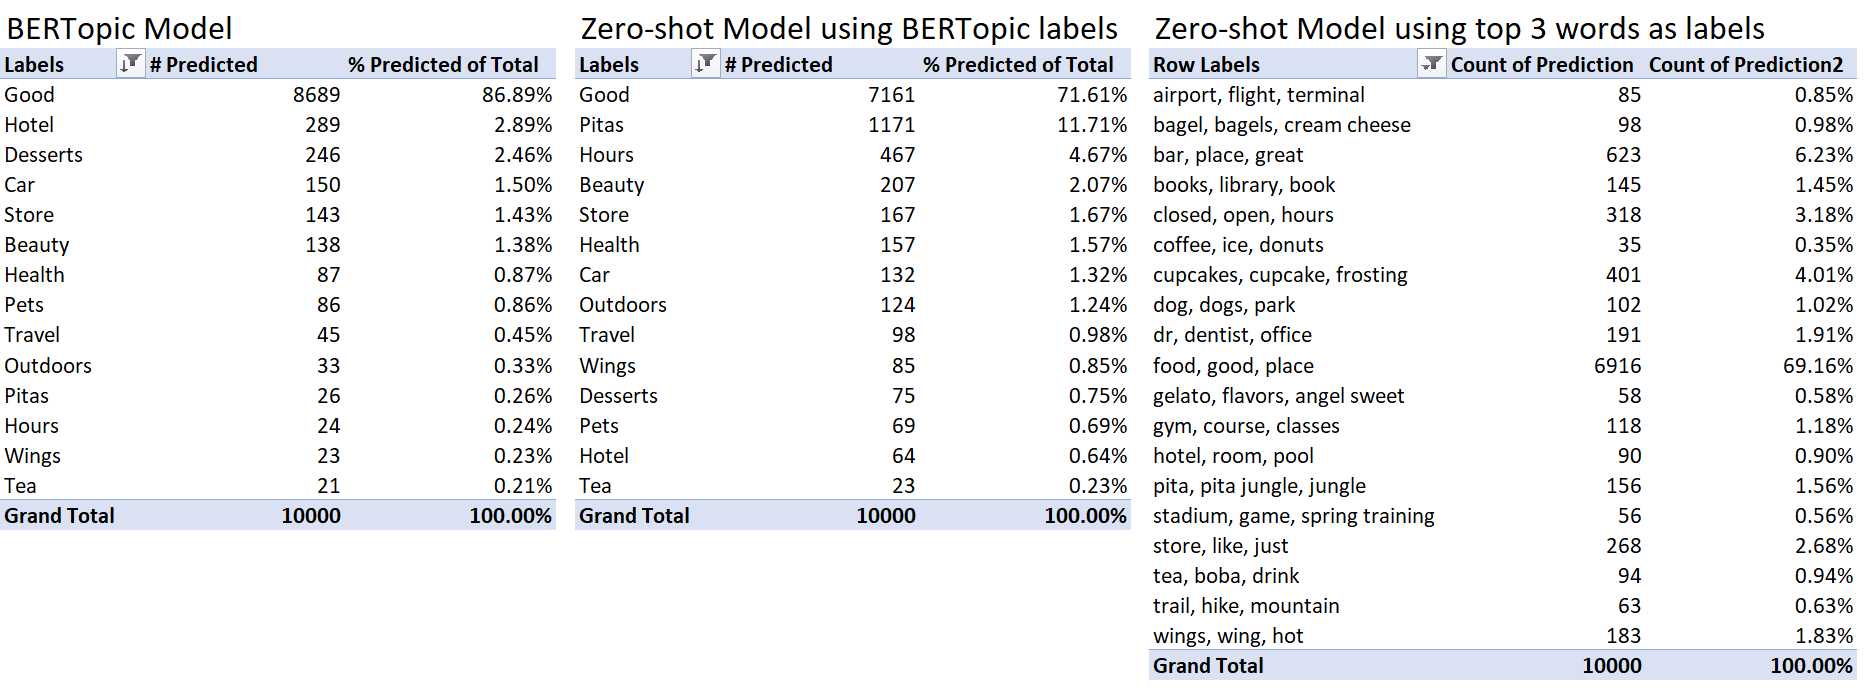

In the BERTopic model analysis, it is evident that the label "Good" was a dominant prediction, accounting for a substantial 86.89% of the reviews. This suggests that the model has a strong inclination toward recognizing positive sentiment in the reviews. Following this overarching sentiment, the top topics predicted by the model were "Hotel," "Desserts," and "Car," each contributing a modest percentage of predictions - 2.89%, 2.46%, and 1.50%, respectively. The presence of "Store," "Beauty," "Health," "Pets," and "Travel" predictions also showcases a reasonable degree of variety in the topics recognized by the model.

Contrasting this, the Zero-shot model that used the BERTopic manual topics, yielded a slightly different distribution of predictions. The label "Good" remained a significant prediction, albeit with a lower percentage of 71.61%. The top predicted topics were notably different from the topic model's outcomes. The Zero-shot model pointed to "Pitas" and "Hours" as the foremost topics, accounting for 11.71% and 4.67% of the predictions, respectively. Interestingly, the inclusion of "Beauty," "Store," "Health," "Car," "Outdoors," "Travel," and "Wings" among the top predictions indicates a more comprehensive understanding of the reviews' content. This diverse range of recognized topics is a notable feature of the Zero-shot model's analysis.

Comparing the two models, it is apparent that both models identified "Good" as a key sentiment, though the topic model displayed a higher degree of confidence in this prediction with its significantly higher percentage. However, the Zero-shot model's broader understanding becomes evident through its prediction of specific topics like "Pitas" and "Hours." Additionally, the Zero-shot model's inclusion of topics such as "Outdoors," "Wings," and "Tea," and the topic model's recognition of "Pets" and "Travel," showcase the models' respective strengths in capturing different nuances of content.

In the Zero-shot Model analysis utilizing the top 3 words as labels, a distinct pattern emerged. Notably, the label "Food, good, place" dominated the predictions, encompassing a substantial 69.16% of the dataset. This reinforces the model's strong bias towards recognizing and associating content with the concept of positive dining experiences. Beyond this prominent sentiment, the top predicted topics included "Bar," "Cupcakes," and "Closed hours," each representing 6.23%, 4.01%, and 3.18% of the predictions, respectively. These diverse categories hint at the model's ability to extend its focus beyond sentiment to encompass various subject matters.

# Limitations and Future work

**Merging correlated topics** presents an avenue for enhancing the interpretability of topic models, streamlining the representation of intricate themes.

The model is only doing singel-label predictions. Exploring the transition from single-label to **multilabel predictions** in the Zero-Shot Topic model offers an opportunity to refine its predictive capabilities. By applying varying thresholds, an in-depth evaluation of model performance can be undertaken.

The application of **confusion matrices** to compare the efficacy of BERTopic and Zero-Shot Topic models lends a quantitative lens to their comparative analysis.

A systematic exploration of **hyperparameter** configurations in both models holds promise for uncovering optimal settings that boost performance.

The potential of **alternative classification models** for Zero-Shot Topic modeling beckons for a comprehensive assessment, shedding light on the most suitable algorithms.

A sample of 10 000 observations from the Yelp reviews dataset is being used. Assessing model **scalability and generalization on a larger dataset**, such as Yelp reviews, offers insights into their real-world applicability. Furthermore, expanding the label set in Zero-Shot Topic modeling beyond a limited scope could elucidate the model's adaptability to diverse topics.

The topics are manually labelled from the top three words from the BERTopic topic predictions. The prospect of **automated topic labeling** emerges as a time-saving avenue as datasets grow in magnitude.

Finally, integrating **sentiment analysis** enriches topic understanding by classifying reviews into sentiment categories, further advancing the utility of topic models.